In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
y_train.shape

(60000,)

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [10]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4728 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2833 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2733 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2662 - accuracy: 0.9261


In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2686 - accuracy: 0.9250


[0.26856374740600586, 0.925000011920929]

In [13]:
y_pred = model.predict(x_test)

In [15]:
y_pred[0]

array([1.7201513e-02, 3.8587598e-07, 5.9242249e-02, 9.5976901e-01,
       2.5345385e-03, 9.5613152e-02, 1.8209309e-06, 9.9989712e-01,
       8.9513659e-02, 7.2289586e-01], dtype=float32)

In [21]:
np.argmax(y_pred[0])

7

In [22]:
y_pred_labels = [np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

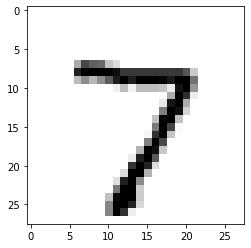

In [18]:
plt.imshow(x_test[0], cmap=plt.cm.binary)

In [24]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_labels)
print(cm)

tf.Tensor(
[[ 959    0    2    1    0    5    7    4    2    0]
 [   0 1118    3    2    0    1    4    2    5    0]
 [   5   10  916   17    9    4   11   11   45    4]
 [   2    0   19  923    0   21    2   14   21    8]
 [   1    2    3    1  911    0   11    6    8   39]
 [   8    4    2   36   11  764   17    9   33    8]
 [   7    3    8    1    8   11  915    2    3    0]
 [   1    6   23    2    5    0    0  971    3   17]
 [   5   13    5   20    9   20    9   18  868    7]
 [  11    7    1   10   26    5    0   40    4  905]], shape=(10, 10), dtype=int32)


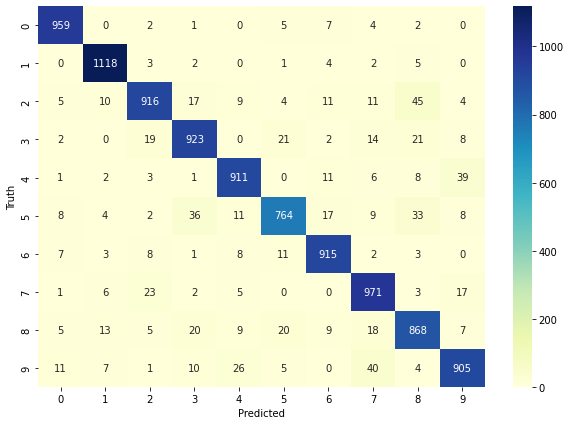

In [32]:
import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## One Hidden Layer is involved

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

In [34]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [36]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0738 - accuracy: 0.9777
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0615 - accuracy: 0.9812
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0516 - accuracy: 0.9841
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0413 - accuracy: 0.9875
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0333 - accuracy: 0.9900


In [37]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0755 - accuracy: 0.9778


[0.07553257793188095, 0.9778000116348267]

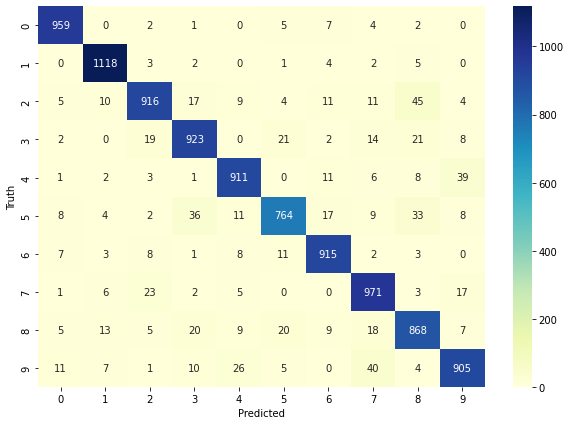

In [38]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()